#**DESCRIPTIVE STATISITCS ASSIGNMENT**

---


##**Author:** Leevashan Pillay
##**Student Number**: 223214973
##**Univeristy of Johannesburg**

**GDP date set**
<br>
Data collected from world bank which have high credibility.

The set consist of countries and their gdp's from 2012 to 2021

<hr>

**Inspiration**
<br>
I am intereseted. I chode this dataset as i recently stubles upon a an article that mentioned something about the BRICS push for a uniform currency. Naturally openminded, im interested in the way in which this could be a benefit for SA
<hr>

**Source**
<br>

https://www.kaggle.com/datasets/yapwh1208/countries-gdp-2012-to-2021

----
----


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

#importing the database

In [ ]:
# read the CSV file into a pandas DataFrame
df = pd.read_csv('gdp.csv') #Change File path to data set here
columns = df.columns.tolist()
print(*columns, sep = "\n")

Country Name
Country Code
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021


----
#cleaning the data
I decided it was best to drop all rows where data was missing for whatever unknown reason. While I did want a 'bigger' picture my intention was to highlight the countries involved in BRICS in comparison to other major countries.
The csv also contained GDPs of different groups like sub-saharan and Low income after the 217 entry which I will needed to seperate from the main dataset.

In [ ]:
Filtered_DF = df.drop(df.index[217:])
Filtered_DF = Filtered_DF.dropna(subset=['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021'])
Filtered_DF = Filtered_DF.drop(Filtered_DF[Filtered_DF['2012']=='..'].index |
                               Filtered_DF[Filtered_DF['2013']=='..'].index |
                               Filtered_DF[Filtered_DF['2014']=='..'].index |
                               Filtered_DF[Filtered_DF['2015']=='..'].index |
                               Filtered_DF[Filtered_DF['2016']=='..'].index |
                               Filtered_DF[Filtered_DF['2017']=='..'].index |
                               Filtered_DF[Filtered_DF['2018']=='..'].index |
                               Filtered_DF[Filtered_DF['2019']=='..'].index |
                               Filtered_DF[Filtered_DF['2020']=='..'].index |
                               Filtered_DF[Filtered_DF['2021']=='..'].index )
region_values = ['Sub-Saharan Africa', 'South Asia', 'North America','Middle East & North Africa','Europe & Central Asia','Africa Western and Central']
regions = df[df['Country Name'].isin(region_values)]


<ipython-input-4-4b64cb409969>:3: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  Filtered_DF = Filtered_DF.drop(Filtered_DF[Filtered_DF['2012']=='..'].index |


In [ ]:
# convert to NumPy array
array = Filtered_DF.to_numpy()
# display the array
print('DIM: ',len(array),'x',len(array[0]))
DATA=[]
for i in range(12):
  DATA.append([])
for row in array:
  DATA[0].append(row[0])
  DATA[1].append(row[1])
  DATA[2].append(float(row[2]))
  DATA[3].append(float(row[3]))
  DATA[4].append(float(row[4]))
  DATA[5].append(float(row[5]))
  DATA[6].append(float(row[6]))
  DATA[7].append(float(row[7]))
  DATA[8].append(float(row[8]))
  DATA[9].append(float(row[9]))
  DATA[10].append(float(row[10]))
  DATA[11].append(float(row[11]))

DIM:  194 x 12


---
#Descriptive stats


In [ ]:
def mean(numbers):
    return sum(numbers)/len(numbers)
    

def variance(numbers,mean):
    n = len(numbers)
    return sum((x - mean) ** 2 for x in numbers) / (n - 1)

def coefficientOfVariation(_variance,_mean):
    return _variance/ _mean * 100

def median(numbers):
    n = len(numbers)
    sorted_numbers = sorted(numbers)
    if n % 2 == 0:
        middle_index_1 = n // 2 - 1
        middle_index_2 = n // 2
        return (sorted_numbers[middle_index_1] + sorted_numbers[middle_index_2]) / 2
    else:
        middle_index = n // 2
        return sorted_numbers[middle_index]

def mode(numbers):
    frequency_dict = {}#using a dictionary to keep track of records
    for number in numbers:
        frequency_dict[number] = frequency_dict.get(number, 0) + 1
    mode_frequency = max(frequency_dict.values())
    modes = [number for number, frequency in frequency_dict.items() if frequency == mode_frequency]
    if len(modes) == len(numbers):
        return None
    elif len(modes) == 1:
        return modes[0]
    else:
        return modes

def quartiles(numbers):
    n = len(numbers)
    sorted_numbers = sorted(numbers)
    q1_index = (n - 1) // 4
    q2_index = (n - 1) // 2
    q3_index = (n - 1) * 3 // 4
    q1 = sorted_numbers[q1_index]
    q2 = sorted_numbers[q2_index]
    q3 = sorted_numbers[q3_index]
    return q1, q2, q3
    
def deciles(numbers):
    sorted_numbers = sorted(numbers)
    n = len(sorted_numbers)
    d1_index = int(n * 0.1)
    d2_index = int(n * 0.2)
    d3_index = int(n * 0.3)
    d4_index = int(n * 0.4)
    d5_index = int(n * 0.5)
    d6_index = int(n * 0.6)
    d7_index = int(n * 0.7)
    d8_index = int(n * 0.8)
    d9_index = int(n * 0.9)
    d1 = sorted_numbers[d1_index]
    d2 = sorted_numbers[d2_index]
    d3 = sorted_numbers[d3_index]
    d4 = sorted_numbers[d4_index]
    d5 = sorted_numbers[d5_index]
    d6 = sorted_numbers[d6_index]
    d7 = sorted_numbers[d7_index]
    d8 = sorted_numbers[d8_index]
    d9 = sorted_numbers[d9_index]
    return d1, d2, d3, d4, d5, d6, d7, d8, d9

def count(numbers):
  return len(numbers)

def skewness(numbers,_mean,_variance):
  sum=0
  for i in numbers:
    sum=sum+(i-_mean)**3
  return sum/ (len(numbers) * (_variance**(1/2))**3)

def fourthMoment(numbers,_mean):
  sum=0
  for i in numbers:
    sum=sum+(i-_mean)**4
  return sum/ len(numbers)
def  kurtosis(_fourthMoment,_variance):
  return (_fourthMoment / _variance**(2)) - 3


#calculate the KS test statistic and p-value
def KolmogorovSmirnov(numbers,_variance,_mean):
  sorted_numbers = sorted(numbers)
  ks_statistic = max([abs((i+1)/len(sorted_numbers) - (sorted_numbers[i]-_mean)/_variance**0.5) for i in range(len(sorted_numbers))])
  ks_p_value = 2 * (1 - 0.5 * (1 + math.erf(ks_statistic / math.sqrt(2))))
  return ks_statistic,ks_p_value

In [ ]:
# Define the data as a dictionary
year_count=2012
data = {}

for year in DATA[2::]:
  year_f=[float(i) for i in year]
  temp=[]
  _mean=mean(year_f)
  temp.append(_mean)

  _variance=variance(year_f,_mean)
  temp.append(_variance)
  temp.append(_variance**(1/2))
  temp.append(coefficientOfVariation(_variance,_mean))
  temp.append(median(year_f))
  temp.append(" ")

  temp.append(min(year_f))
  q1,q2,q3=quartiles(year_f)
  temp.append(q1)
  temp.append(q2)
  temp.append(q3)
  temp.append(max(year_f))
  temp.append(max(year_f)-min(year_f))
  temp.append(q3-q1)
  temp.append((q3-q1)/2)
  temp.append(q1 - 1.5 *(q3-q1))
  temp.append(q3 + 1.5 *(q3-q1))  
  temp.append(count(year))

  temp.append(" ")
  d1, d2, d3, d4, d5, d6, d7, d8, d9=deciles(year_f)
  temp.append(d1)
  temp.append(d2)
  temp.append(d3)
  temp.append(d4)
  temp.append(d5)
  temp.append(d6)
  temp.append(d7)
  temp.append(d8)
  temp.append(d9)

  temp.append(" ")
  temp.append(skewness(year_f,_mean,_variance))
  _fourthMoment=fourthMoment(year_f,_mean)
  temp.append(kurtosis(_fourthMoment,_variance))

  temp.append(" ")
  KS_TestStatistic,KS_Pvalue=KolmogorovSmirnov(year_f,_variance,_mean)
  temp.append(KS_TestStatistic)
  temp.append(KS_Pvalue)

  data[str(year_count)]=temp

  year_count=year_count+1



# Create a pandas dataframe
dateframe = pd.DataFrame(data)

# Set the row and column headers
dateframe.index = ['mean', 'variance', 'standard dev','coeff.variation','median',' ',
                   'min','q1','q2','q3','max','range','IQR','quartile dev','lower fence','upper fence','count',' ',
                   '1st_decile','2nd_decile','3rd_decile','4th_decile','5th_decile','6th_decile','7th_decile','8th_decile','9th_decile',' ',
                   'skewness','kurtosis',' ',
                   'KS_TestStatistic','KS_Pvalue']
dateframe.columns ==['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
# Output the dataframe as a table
print(dateframe.to_string())

                                         2012                         2013                         2014                         2015                         2016                         2017                         2018                         2019                         2020                         2021
mean                      349422736726.238159          359117221301.035034          370095671112.161804          382079146116.038757          392570015473.334412           405692096409.97229           419555827606.25531          430191111100.348572          416694195045.536377          441044116989.802124
variance          2134592027525832545140736.0  2259107835781945636159488.0  2407577405154704842817536.0  2593684734039067509915648.0  2740455561254111165808640.0  2929305622029775178563584.0  3175552336424519826669568.0  3374934826936241129259008.0  3281070850387083373051904.0  3714641399611696758128640.0
standard dev             1461024307643.727295         1503032879142.018555     

---
#Diagrams

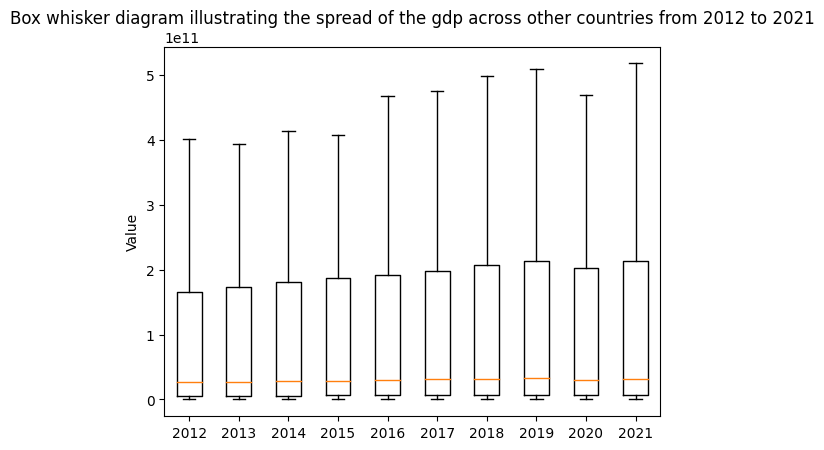

In [ ]:

data = DATA[2:]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the box and whisker diagrams
ax.boxplot(data,showfliers=False)

# Set the labels for the x-axis and y-axis
ax.set_xticklabels(['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021'])
ax.set_ylabel('Value')
plt.title('Box whisker diagram illustrating the spread of the gdp across other countries from 2012 to 2021')
# Show the plot
plt.show()

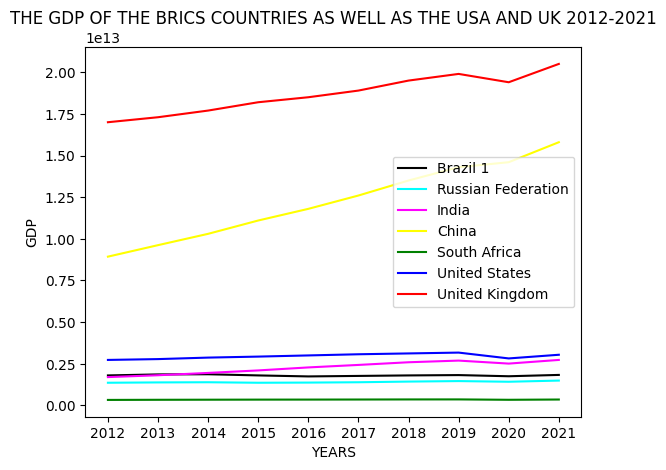

In [ ]:
# Define the x and y data for each line
brazil=[]
russia=[]
india=[]
china=[]
sa=[]
usa=[]
england=[]
for d in DATA[2::]:
  brazil.append(d[DATA[0].index('Brazil')])
  russia.append(d[DATA[0].index('Russian Federation')])
  india.append(d[DATA[0].index('India')])
  china.append(d[DATA[0].index('China')])
  sa.append(d[DATA[0].index('South Africa')])
  usa.append(d[DATA[0].index('United Kingdom')])
  england.append(d[DATA[0].index('United States')])
x =['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']


# Plot the data as lines with different colors and labels
plt.plot(x, brazil, color='black', label='Brazil 1')
plt.plot(x, russia, color='cyan', label='Russian Federation')
plt.plot(x, india, color='magenta', label='India')
plt.plot(x, china, color='yellow', label='China')
plt.plot(x, sa, color='green', label='South Africa')
plt.plot(x, usa, color='blue', label='United States')
plt.plot(x, england, color='red', label='United Kingdom')

# Add a legend to the plot
plt.legend()

# Add labels and title
plt.xlabel('YEARS')
plt.ylabel('GDP')
plt.title('THE GDP OF THE BRICS COUNTRIES AS WELL AS THE USA AND UK 2012-2021')

# Display the plot
plt.show()

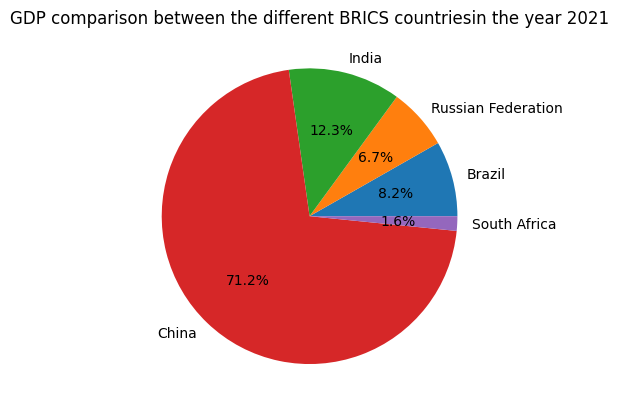

In [ ]:
labels =['Brazil','Russian Federation','India','China','South Africa']

sizes = [DATA[11][DATA[0].index('Brazil')],
        DATA[11][DATA[0].index('Russian Federation')],
        DATA[11][DATA[0].index('India')],
        DATA[11][DATA[0].index('China')],
        DATA[11][DATA[0].index('South Africa')]]

# Plot the data as a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('GDP comparison between the different BRICS countriesin the year 2021')

# Display the plot
plt.show()

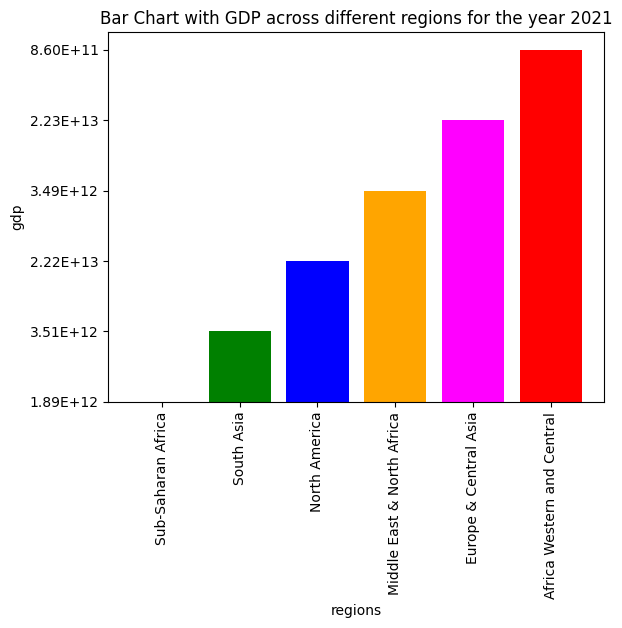

In [ ]:

# Sample data
array = regions.to_numpy()
values=[]
for area in region_values:
  for row in array:
    if area==row[0]:
      values.append(row[11])
      break
colors = ['red', 'green', 'blue', 'orange','Magenta']

# Create bar chart
plt.bar(region_values, values, color=colors)

# Customize chart
plt.title('Bar Chart with GDP across different regions for the year 2021')
plt.xlabel('regions')
plt.ylabel('gdp')
plt.xticks(rotation=90)

# Show chart
plt.show()

(194,)


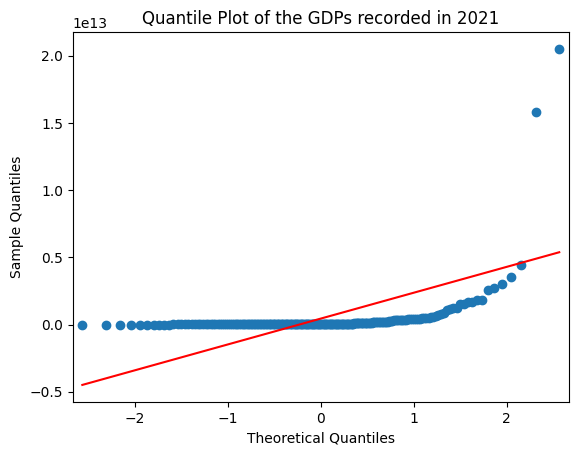

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

x = np.array(DATA[11])
print(x.shape)
# Create quantile plot
sm.qqplot(x, line='s')

# Customize plot
plt.title('Quantile Plot of the GDPs recorded in 2021')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Show plot
plt.show()

---
#Conclusions

*   The mean GDP has shown increase over the years. A 26.22% increase was calculated between the years of 2012 and 2022. Rising GDP means the economy is growing, and the more resources are becoming available to more people in more counties – goods and services, wages and profits – are increasing. 
*   This is supported by looking a the upper and lower bounds of the quartile ranges, both are increasing. looking at the box plots, the data is positively skewed,with the Means  being greater than the mode and median which is a relatively good thing.
*   However, looking at the variance we also see an increase over the years. Meaning that there has been more spread over the data, making it not so consistent.
---
*   Its tough to draw conclusions without seeing the GDP for China after events such as covid and current relations with other countries such as the US. But based on the pie chart, in 2021, the BRICS push for a uniform curency might have been more beneficial for most parties involved.
*   Looking at the line graph, We see the gdp for the US is low. This could possibly be due to the fact that the US Imports alot more than it exports. The Opposite to what we see by looking at the bargraph where the African countries showcases higher GDPs quite possibly cause of more imports of raw materials.
---
*   By looking at the the quartile plot aswell as the KolmogorovSmirnov test statistics, one can reasonably conclude that gdp is NOT normally distributeed across all countries. The GDPs more further away from the mean rather than nearer, implying that there is huge gap between countries with high gdps and countries with low gdps.
